**GitHub:**

https://github.com/rezash121/Modern-NLP-techniques-practical-usage

In [ ]:
# ================= Synthetic Dataset Creation and Augmentation =================
# This script creates a synthetic dataset (>= 500 sentences) and uses nlpaug
# for insertion, deletion, and synonym replacement.

# Step 1: Install Dependencies
# ----------------------------
!pip install --quiet nlpaug nltk pandas transformers

# Step 2: Import Libraries
# ------------------------
import pandas as pd
import random
import nltk
import nlpaug.augmenter.word as naw

# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

# Step 3: Create Synthetic Dataset (at least 500 sentences)
# ---------------------------------------------------------
positive_phrases = [
    "I absolutely loved",
    "This is a fantastic",
    "Highly recommend",
    "Exceeded my expectations",
    "Brilliant performance of",
    "Remarkable quality in",
    "Thrilled with",
    "Delighted by",
    "Impressed with",
    "A wonderful experience with"
]

negative_phrases = [
    "I really disliked",
    "This is a terrible",
    "Do not recommend",
    "Fell short of my expectations",
    "Poor performance of",
    "Disappointing quality in",
    "Unhappy with",
    "Frustrated by",
    "Let down by",
    "A horrible experience with"
]

subjects = [
    "this product.",
    "the service.",
    "the experience.",
    "the quality.",
    "the design.",
    "the user interface.",
    "the customer support.",
    "the functionality.",
    "the value for money.",
    "the durability."
]

random.seed(42)
num_samples = 250  # 250 positive + 250 negative = 500 total

positive_sentences = [
    f"{random.choice(positive_phrases)} {random.choice(subjects)}"
    for _ in range(num_samples)
]
negative_sentences = [
    f"{random.choice(negative_phrases)} {random.choice(subjects)}"
    for _ in range(num_samples)
]

sentences = positive_sentences + negative_sentences
labels = [1]*num_samples + [0]*num_samples

data = pd.DataFrame({'sentence': sentences, 'label': labels})
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Sample of Original Synthetic Dataset:")
display(data.head(5))

# Step 4: Augmentation (Insert, Delete, Replace with Synonyms)
# ------------------------------------------------------------
# 1) SynonymAug for replacement
# 2) ContextualWordEmbsAug with "insert"
# 3) RandomWordAug for deletion
syn_aug = naw.SynonymAug(aug_p=0.1)  # Synonym replacement
ins_aug = naw.ContextualWordEmbsAug(action="insert", aug_p=0.1, model_path='bert-base-uncased')  # Word insertion
del_aug = naw.RandomWordAug(action='delete', aug_p=0.1)  # Word deletion

# Apply augmentations
data['syn_aug_sentence'] = data['sentence'].apply(lambda x: syn_aug.augment(x))
data['ins_aug_sentence'] = data['sentence'].apply(lambda x: ins_aug.augment(x))
data['del_aug_sentence'] = data['sentence'].apply(lambda x: del_aug.augment(x))

print("\nAugmented Dataset Sample:")
display(data[['sentence', 'syn_aug_sentence', 'ins_aug_sentence', 'del_aug_sentence', 'label']].head(10))

# (Optional) Save to CSV if needed:
# data.to_csv("augmented_data.csv", index=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.6 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Sample of Original Synthetic Dataset:


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,sentence,label
0,Frustrated by the user interface.,0
1,A wonderful experience with the quality.,1
2,Poor performance of the quality.,0
3,Exceeded my expectations the user interface.,1
4,Exceeded my expectations the design.,1


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Augmented Dataset Sample:


,sentence,syn_aug_sentence,ins_aug_sentence,del_aug_sentence,label
0,Frustrated by the user interface.,[Frustrated by the user interface.],[frustrated further by the user interface.],[Frustrated by user interface.],0
1,A wonderful experience with the quality.,[A wonderful experience with the quality.],[a wonderful personal experience with the qual...,[A wonderful experience the quality.],1
2,Poor performance of the quality.,[Poor performance of the tone.],[poor performance dependence of the quality.],[Performance of the quality.],0
3,Exceeded my expectations the user interface.,[Exceeded my expectations the user interface.],[adam exceeded my expectations the user interf...,[Exceeded my the user interface.],1
4,Exceeded my expectations the design.,[Exceeded my expectations the intention.],[exceeded my expectations about the design.],[Exceeded my the design.],1
5,Poor performance of this product.,[Poor performance of this production.],[poor performance of in this product.],[Poor of this product.],0
6,Disappointing quality in the functionality.,[Disappointing quality in the functionality.],[disappointing quality flaws in the functional...,[Disappointing quality in functionality.],0
7,This is a fantastic this product.,[This is a fantastic this intersection.],[this is a truly fantastic this product.],[This is a fantastic product.],1
8,Highly recommend the functionality.,[Highly advocate the functionality.],[highly recommend are the functionality.],[Highly the functionality.],1
9,Poor performance of this product.,[Poor performance of this product.],[poor performance aspects of this product.],[Poor performance of product.],0


In [ ]:
# ==================== Handle Missing Values & Reconstruct with T5 ====================
# Simulate 10% missing sentences in 'augmented_data' and use T5 to rebuild them.

# 1. Install and Import Required Packages
!pip install --quiet transformers datasets

import numpy as np
import torch
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

# 'data' is assumed to be your original DataFrame with 'sentence' and 'label' columns.
augmented_data = data.copy()

# 2. Simulate Missing Values (Remove 10% of Sentences)
augmented_data['sentence'] = augmented_data['sentence'].astype(str)
num_missing = int(0.1 * len(augmented_data))
missing_indices = np.random.choice(augmented_data.index, size=num_missing, replace=False)
augmented_data.loc[missing_indices, 'sentence'] = np.nan

# 3. Prepare Training Data (Use Non-Missing for T5 Fine-Tuning)
train_df = augmented_data[augmented_data['sentence'].notna()].copy()
train_df['input_text'] = train_df['label'].apply(lambda x: "positive" if x == 1 else "negative")
train_df['target_text'] = train_df['sentence']

dataset = Dataset.from_pandas(train_df[['input_text','target_text']]).train_test_split(
    test_size=0.1,
    seed=42
)
train_dataset, val_dataset = dataset['train'], dataset['test']

# 4. Tokenize
tokenizer = T5Tokenizer.from_pretrained('t5-small')

def preprocess_function(examples):
    # Prefix instructions for T5
    inputs = ["reconstruct: " + x for x in examples['input_text']]
    model_inputs = tokenizer(inputs, padding='max_length', truncation=True, max_length=32)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['target_text'], padding='max_length', truncation=True, max_length=64)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset   = val_dataset.map(preprocess_function, batched=True)
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# 5. Fine-Tune T5
model = T5ForConditionalGeneration.from_pretrained('t5-small')
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    evaluation_strategy='epoch',
    logging_steps=10,
    report_to=[],  # <--- Disable WandB or other logging integrations
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)
trainer.train()

# 6. Reconstruct Missing Sentences
missing_df = augmented_data[augmented_data['sentence'].isna()].copy()
missing_df['input_text'] = missing_df['label'].apply(lambda x: "positive" if x == 1 else "negative")
inputs = ["reconstruct: " + x for x in missing_df['input_text']]
tokenized = tokenizer(inputs, return_tensors='pt', padding='max_length', truncation=True, max_length=32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
input_ids, attention_mask = tokenized['input_ids'].to(device), tokenized['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    gen_ids = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=64,
        num_beams=4,
        early_stopping=True
    )

missing_df['sentence'] = tokenizer.batch_decode(gen_ids, skip_special_tokens=True)
augmented_data.loc[missing_df.index, 'sentence'] = missing_df['sentence']

print("Reconstruction complete. Missing sentences replaced.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/405 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/45 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,5.003000,1.567937
2,1.619700,0.860498
3,1.098200,0.718885
4,0.688000,0.553276
5,0.555800,0.466519
6,0.507400,0.415618
7,0.463900,0.355992
8,0.412500,0.319870
9,0.367600,0.298107
10,0.363200,0.290979


Reconstruction complete. Missing sentences replaced.


In [ ]:
# ------------------------------------------------
# Step 1: Kaggle API Setup & Dataset Download
# ------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/  # Or the path to where you uploaded kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip


Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
100% 25.7M/25.7M [00:01<00:00, 35.5MB/s]
100% 25.7M/25.7M [00:01<00:00, 21.9MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
# ------------------------------------------------
# Step 0: Install Required Libraries
# ------------------------------------------------

import os
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset



DATA_FILE = "IMDB Dataset.csv"

# ------------------------------------------------
# Step 2: Load and Inspect Data
# ------------------------------------------------
df = pd.read_csv(DATA_FILE)
df.rename(columns={"sentiment": "label", "review": "text"}, inplace=True)

# Convert labels to numeric: positive -> 1, negative -> 0
df['label'] = df['label'].map({'positive': 1, 'negative': 0})

print("Data Sample:")
display(df.head())

# ------------------------------------------------
# Step 3: Basic Preprocessing
# ------------------------------------------------
# Example: remove HTML tags, lowercasing, etc.
def basic_cleaning(text):
    text = re.sub(r'<.*?>', '', text)         # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove punctuation/symbols
    text = text.lower().strip()
    return text

df['clean_text'] = df['text'].apply(basic_cleaning)

# ------------------------------------------------
# Step 4: Split Data for Training/Testing
# ------------------------------------------------
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# ------------------------------------------------
# Step 5A: Baseline Model (Logistic Regression)
# ------------------------------------------------
# We can use a simple "bag of words" or TF-IDF for text representation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
y_train = train_df['label']
X_test = vectorizer.transform(test_df['clean_text'])
y_test = test_df['label']

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy = {lr_acc:.4f}")

# ------------------------------------------------
# Step 5B: Transformer Model (TinyBERT/DistilBERT)
# ------------------------------------------------
# For demonstration, we'll use 'distilbert-base-uncased' or a smaller BERT-like model.
# (TinyBERT is also available, but often requires additional steps to load.)
transformer_model_name = "distilbert-base-uncased"  # or "huawei-noah/TinyBERT_General_4L_312D"

tokenizer = AutoTokenizer.from_pretrained(transformer_model_name)

# We convert our Pandas data to a Hugging Face 'Dataset' object
def tokenize_function(examples):
    return tokenizer(examples["clean_text"], truncation=True, padding="max_length", max_length=128)

# Create HF Dataset for train & test
train_hf = Dataset.from_pandas(train_df[['clean_text','label']].reset_index(drop=True))
test_hf  = Dataset.from_pandas(test_df[['clean_text','label']].reset_index(drop=True))

# Apply tokenization
train_hf = train_hf.map(tokenize_function, batched=True)
test_hf  = test_hf.map(tokenize_function, batched=True)

# Set the format for PyTorch
train_hf.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_hf.set_format("torch",  columns=["input_ids", "attention_mask", "label"])

# Load pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained(transformer_model_name, num_labels=2)

# Training hyperparameters
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    logging_steps=100,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    save_strategy="epoch",
    report_to=[]  # disable logging to W&B or other services
)

# Define accuracy function
!pip install evaluate
import evaluate
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_metric.compute(predictions=preds, references=labels)
    return acc

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hf,
    eval_dataset=test_hf,
    compute_metrics=compute_metrics
)

# Fine-tune
print("\n--- Fine-Tuning Transformer Model ---")
trainer.train()

# Evaluate the Transformer model
eval_result = trainer.evaluate()
transformer_acc = eval_result['eval_accuracy']
print(f"Transformer Model Accuracy = {transformer_acc:.4f}")

# ------------------------------------------------
# Step 6: Results Comparison
# ------------------------------------------------
print("\n--- Final Comparison ---")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Transformer Model Accuracy:   {transformer_acc:.4f}")


Data Sample:


,text,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Logistic Regression Accuracy = 0.8813


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00



--- Fine-Tuning Transformer Model ---


Epoch,Training Loss,Validation Loss,Accuracy
1,0.301600,0.259494,0.891200
2,0.174200,0.333291,0.898100


Transformer Model Accuracy = 0.8981

--- Final Comparison ---
Logistic Regression Accuracy: 0.8813
Transformer Model Accuracy:   0.8981


In [ ]:
# ----------------------------
# Category 2: Tokenization
# ----------------------------

# Step 4: Tokenizer Comparison
# ----------------------------

# Install necessary libraries (uncomment if not already installed)
# !pip install transformers datasets tokenizers

from transformers import BertTokenizer, GPT2Tokenizer, RobertaTokenizer
from datasets import load_dataset
import os

# Load a sample of the IMDB dataset
dataset = load_dataset('imdb', split='train[:100]')  # Using 100 samples for quick demonstration

# Select a sample sentence
sample_sentence = dataset[0]['text']
print("### Sample Sentence:")
print(sample_sentence[:500], "...")  # Displaying first 500 characters for brevity

# Initialize the tokenizers
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the sample sentence with BERT
bert_tokens = bert_tokenizer.tokenize(sample_sentence)
bert_token_ids = bert_tokenizer.convert_tokens_to_ids(bert_tokens)

# Tokenize the sample sentence with GPT-2
gpt2_tokens = gpt2_tokenizer.tokenize(sample_sentence)
gpt2_token_ids = gpt2_tokenizer.convert_tokens_to_ids(gpt2_tokens)

# Tokenize the sample sentence with RoBERTa
roberta_tokens = roberta_tokenizer.tokenize(sample_sentence)
roberta_token_ids = roberta_tokenizer.convert_tokens_to_ids(roberta_tokens)

# Display tokenization results
print("\n### BERT Tokenization:")
print(f"Tokens: {bert_tokens[:20]} ...")
print(f"Token IDs: {bert_token_ids[:20]} ...")

print("\n### GPT-2 Tokenization:")
print(f"Tokens: {gpt2_tokens[:20]} ...")
print(f"Token IDs: {gpt2_token_ids[:20]} ...")

print("\n### RoBERTa Tokenization:")
print(f"Tokens: {roberta_tokens[:20]} ...")
print(f"Token IDs: {roberta_token_ids[:20]} ...")

# Step 5: Custom Tokenizer Training
# ---------------------------------

from tokenizers import ByteLevelBPETokenizer
from transformers import PreTrainedTokenizerFast

# Prepare the text data for training the custom tokenizer
# Using the same IMDB dataset subset
texts = [example['text'] for example in dataset]

# Save the texts to a temporary file
with open('train_text.txt', 'w', encoding='utf-8') as f:
    for text in texts:
        f.write(text + '\n')

# Initialize a Byte-Pair Encoding (BPE) tokenizer
custom_tokenizer = ByteLevelBPETokenizer()

# Train the tokenizer
custom_tokenizer.train(
    files='train_text.txt',
    vocab_size=3000,
    min_frequency=2,
    special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"]
)

# Save the tokenizer
custom_tokenizer_dir = "custom_tokenizer"
os.makedirs(custom_tokenizer_dir, exist_ok=True)
custom_tokenizer.save_model(custom_tokenizer_dir)

print("\n### Custom Tokenizer Trained and Saved.")

# Reload the tokenizer using Hugging Face's PreTrainedTokenizerFast
reloaded_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file=os.path.join(custom_tokenizer_dir, 'vocab.json'),
    tokenizer_object=custom_tokenizer # Pass the custom_tokenizer directly to avoid re-loading
)
# Add special tokens if necessary
reloaded_tokenizer.add_special_tokens({
    "bos_token": "<s>",
    "eos_token": "</s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>",
    "mask_token": "<mask>",
})

# Test the reloaded tokenizer on a new sentence
new_sentence = "Hello world! This is a custom tokenizer."
encoded = reloaded_tokenizer(new_sentence)
decoded = reloaded_tokenizer.decode(encoded['input_ids'])

print("\n### Reconstructed Sentence using Custom Tokenizer:")
print(f"Original: {new_sentence}")
print(f"Decoded: {decoded}")

# Cleanup temporary files
os.remove('train_text.txt')


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### Sample Sentence:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attent ...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]


### BERT Tokenization:
Tokens: ['i', 'rented', 'i', 'am', 'curious', '-', 'yellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when'] ...
Token IDs: [1045, 12524, 1045, 2572, 8025, 1011, 3756, 2013, 2026, 2678, 3573, 2138, 1997, 2035, 1996, 6704, 2008, 5129, 2009, 2043] ...

### GPT-2 Tokenization:
Tokens: ['I', 'Ġrented', 'ĠI', 'ĠAM', 'ĠC', 'URI', 'OUS', '-', 'Y', 'ELL', 'OW', 'Ġfrom', 'Ġmy', 'Ġvideo', 'Ġstore', 'Ġbecause', 'Ġof', 'Ġall', 'Ġthe', 'Ġcontroversy'] ...
Token IDs: [40, 26399, 314, 3001, 327, 47269, 20958, 12, 56, 23304, 3913, 422, 616, 2008, 3650, 780, 286, 477, 262, 10386] ...

### RoBERTa Tokenization:
Tokens: ['I', 'Ġrented', 'ĠI', 'ĠAM', 'ĠC', 'URI', 'OUS', '-', 'Y', 'ELL', 'OW', 'Ġfrom', 'Ġmy', 'Ġvideo', 'Ġstore', 'Ġbecause', 'Ġof', 'Ġall', 'Ġthe', 'Ġcontroversy'] ...
Token IDs: [100, 16425, 38, 3326, 230, 42338, 18024, 12, 975, 25322, 4581, 31, 127, 569, 1400, 142, 9, 70, 5, 6170] ...

### Custom Token

In [ ]:
# ----------------------------
# Fine-Tuning and Binary Classification with Transformers
# ----------------------------

# Step 0: Install Necessary Libraries
# -----------------------------------
# Uncomment the following lines if you need to install the libraries
# !pip install transformers datasets scikit-learn evaluate

# Install 'evaluate' library for metric computations
!pip install evaluate

import pandas as pd
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import evaluate

# ----------------------------
# 1. Fine-Tuning for Sentiment Analysis (IMDB)
# ----------------------------

print("### Fine-Tuning DistilBERT on IMDB Sentiment Analysis Dataset")

# Load the IMDB dataset
imdb = load_dataset('imdb')

# Initialize the tokenizer for DistilBERT
distilbert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize_imdb(example):
    return distilbert_tokenizer(
        example['text'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

# Apply tokenization
tokenized_imdb = imdb.map(tokenize_imdb, batched=True)

# Rename label column to 'labels' as expected by Trainer
tokenized_imdb = tokenized_imdb.rename_column("label", "labels")

# Set the format for PyTorch
tokenized_imdb.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Define training and evaluation datasets
train_imdb = tokenized_imdb['train']
test_imdb = tokenized_imdb['test']

# Load the pre-trained DistilBERT model for sequence classification
distilbert_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Define training arguments
training_args_imdb = TrainingArguments(
    output_dir='./results_imdb',
    num_train_epochs=3,                   # Train for 3 epochs
    per_device_train_batch_size=16,       # Batch size for training
    per_device_eval_batch_size=16,        # Batch size for evaluation
    evaluation_strategy='epoch',          # Evaluate at the end of each epoch
    save_strategy='epoch',                # Save model at the end of each epoch
    logging_dir='./logs_imdb',            # Directory for logs
    logging_steps=100,                    # Log every 100 steps
    load_best_model_at_end=True,          # Load the best model at the end
    metric_for_best_model='accuracy',     # Best model based on accuracy
    report_to=[],                          # Disable Weights & Biases logging
)

# Define evaluation metrics
def compute_metrics_imdb(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    return {'accuracy': acc}

# Initialize Trainer
trainer_imdb = Trainer(
    model=distilbert_model,
    args=training_args_imdb,
    train_dataset=train_imdb,
    eval_dataset=test_imdb,
    compute_metrics=compute_metrics_imdb
)

# Train the model
trainer_imdb.train()

# Evaluate the model
results_imdb = trainer_imdb.evaluate()
print(f"### IMDB Sentiment Analysis - Validation Loss: {results_imdb['eval_loss']:.4f}, Accuracy: {results_imdb['eval_accuracy']:.4f}")



### Fine-Tuning DistilBERT on IMDB Sentiment Analysis Dataset


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.259600,0.258956,0.896520
2,0.156300,0.337237,0.901840
3,0.062900,0.397857,0.911400


### IMDB Sentiment Analysis - Validation Loss: 0.3979, Accuracy: 0.9114


In [ ]:
# ----------------------------
# 2. Binary Classification Task (SMS Spam)
# ----------------------------

print("\n### Fine-Tuning BERT on SMS Spam Classification Dataset")

# Load the SMS Spam dataset
# Using 'sms_spam' dataset from Hugging Face Datasets
# If 'sms_spam' is not available, you can use an alternative like 'sms_spam_collection'
try:
    sms = load_dataset('sms_spam', split='train')
except:
    # Alternative dataset if 'sms_spam' is not found
    sms = load_dataset('sms_spam_collection', split='train')

# Display dataset features to verify column names
print("\n### SMS Spam Dataset Features:")
print(sms.features)

# Since the 'sms_spam' dataset might not have a predefined train-test split, create one
sms = sms.train_test_split(test_size=0.2, seed=42)

# Initialize the tokenizer for BERT
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_sms(example):
    # Determine the correct field name based on dataset features
    if 'message' in example:
        text_field = example['message']
    elif 'sms' in example:
        text_field = example['sms']
    else:
        raise KeyError("The dataset does not contain 'message' or 'sms' fields.")

    return bert_tokenizer(
        text_field,                  # Correct field name
        padding='max_length',
        truncation=True,
        max_length=128
    )

# Apply tokenization
tokenized_sms = sms.map(tokenize_sms, batched=True)

# Rename label column to 'labels' as expected by Trainer
# Ensure that the label is binary (0 and 1). If labels are 'ham' and 'spam', map them accordingly
if isinstance(tokenized_sms['train']['label'][0], str):
    label_mapping = {'ham': 0, 'spam': 1}
    tokenized_sms = tokenized_sms.map(lambda x: {'labels': label_mapping[x['label']]}, batched=False)
else:
    tokenized_sms = tokenized_sms.rename_column("label", "labels")

# Set the format for PyTorch
tokenized_sms.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Define training and evaluation datasets
train_sms = tokenized_sms['train']
test_sms = tokenized_sms['test']

# Load the pre-trained BERT model for sequence classification
bert_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args_sms = TrainingArguments(
    output_dir='./results_sms',
    num_train_epochs=1,                   # Train for 1 epoch
    per_device_train_batch_size=16,       # Batch size for training
    per_device_eval_batch_size=16,        # Batch size for evaluation
    evaluation_strategy='epoch',          # Evaluate at the end of each epoch
    save_strategy='epoch',                # Save model at the end of each epoch
    logging_dir='./logs_sms',             # Directory for logs
    logging_steps=100,                    # Log every 100 steps
    load_best_model_at_end=True,          # Load the best model at the end
    metric_for_best_model='f1',           # Best model based on F1-score
    report_to=[],                          # Disable Weights & Biases logging
)

# Define evaluation metrics
def compute_metrics_sms(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Initialize Trainer
trainer_sms = Trainer(
    model=bert_model,
    args=training_args_sms,
    train_dataset=train_sms,
    eval_dataset=test_sms,
    compute_metrics=compute_metrics_sms
)

# Train the model
trainer_sms.train()

# Evaluate the model
results_sms = trainer_sms.evaluate()

# # Check if metrics are present
# expected_metrics = ['precision', 'recall', 'f1']
# missing_metrics = [metric for metric in expected_metrics if metric not in results_sms]

# if not missing_metrics:
#     print(f"### SMS Spam Classification - Precision: {results_sms['precision']:.4f}, Recall: {results_sms['recall']:.4f}, F1-Score: {results_sms['f1']:.4f}")
# else:
#     print(f"### Evaluation metrics missing: {missing_metrics}")
#     print("### Available metrics:")
#     for key in results_sms.keys():
#         print(f"- {key}")


### Fine-Tuning BERT on SMS Spam Classification Dataset

### SMS Spam Dataset Features:
{'sms': Value(dtype='string', id=None), 'label': ClassLabel(names=['ham', 'spam'], id=None)}


Map:   0%|          | 0/1115 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1
1,0.049300,0.045652,0.992908,0.939597,0.965517


In [ ]:
# ==================== BLIP Image Captioning + Persian Translation ====================
# 1) Generate English captions with "Salesforce/blip-image-captioning-base"
# 2) Translate English -> Persian using "facebook/m2m100_418M" (publicly accessible)

# If running in a fresh environment, install these:
# !pip install transformers pillow requests

import torch
from PIL import Image
import requests
from io import BytesIO
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import M2M100Tokenizer, M2M100ForConditionalGeneration

# ----------------------------
# Step 1: Load BLIP for captioning
# ----------------------------
blip_model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(blip_model_name)
blip_model = BlipForConditionalGeneration.from_pretrained(blip_model_name).eval()

def generate_caption(image):
    """Generate an English caption from a PIL image using BLIP."""
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        generated_ids = blip_model.generate(**inputs, max_length=30, num_beams=5)
    caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    return caption

# ----------------------------
# Step 2: Load M2M100 (English -> Persian)
# ----------------------------
# "facebook/m2m100_418M" is a multilingual model that can handle many language pairs
# including English <-> Persian. We'll force output to Persian by setting forced_bos_token_id.
m2m_model_name = "facebook/m2m100_418M"
m2m_tokenizer = M2M100Tokenizer.from_pretrained(m2m_model_name)
m2m_model = M2M100ForConditionalGeneration.from_pretrained(m2m_model_name).eval()

def translate_to_persian(english_text):
    """Translate English text to Persian using M2M100."""
    # 1) Indicate source language is English
    m2m_tokenizer.src_lang = "en"

    # 2) Tokenize
    encoded = m2m_tokenizer(english_text, return_tensors="pt")

    # 3) Generate, forcing BOS token to Persian
    forced_bos_id = m2m_tokenizer.get_lang_id("fa")
    with torch.no_grad():
        generated_tokens = m2m_model.generate(
            **encoded,
            max_length=64,
            num_beams=4,
            early_stopping=True,
            forced_bos_token_id=forced_bos_id
        )

    # 4) Decode
    persian_text = m2m_tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]
    return persian_text

# ----------------------------
# Step 3: Provide 5 images
# ----------------------------
image_urls = [
    "https://www.bluecross.org.uk/sites/default/files/d8/styles/theme_feature_extra_large/public/2024-05/BX170007_Daisy-2024-04-23-0911_lpr.jpg.webp?itok=1VaZGoSw"
    "https://images.pexels.com/photos/6836442/pexels-photo-6836442.jpeg",
    "https://images.pexels.com/photos/12102576/pexels-photo-12102576.jpeg",
    "https://images.pexels.com/photos/27082077/pexels-photo-27082077/free-photo-of-film-photo-of-boats-moored-on-the-shore.jpeg",
    "https://images.pexels.com/photos/4263136/pexels-photo-4263136.jpeg",
    "https://images.pexels.com/photos/18510834/pexels-photo-18510834/free-photo-of-vegetables-on-a-plate.jpeg"
    ]

for url in image_urls:
    response = requests.get(url)
    if not response.ok:
        print(f"Failed to download {url}, status code:", response.status_code)
        continue

    # Check content type to ensure it's an image
    content_type = response.headers.get("Content-Type", "")
    if not content_type.startswith("image/"):
        print(f"URL {url} returned content type '{content_type}', not an image.")
        continue

    # Now try to open the image
    try:
        image = Image.open(BytesIO(response.content)).convert("RGB")
        print(f"Successfully opened image from {url}")
        # Do something with the image...
    except Exception as e:
        print(f"Error reading image from {url}: {e}")

# ----------------------------
# Step 4: Generate & Translate Captions
# ----------------------------
for idx, url in enumerate(image_urls, start=1):
    # Download the image
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert("RGB")

    # Get English caption from BLIP
    english_caption = generate_caption(image)

    # Translate to Persian
    persian_caption = translate_to_persian(english_caption)

    print(f"Image {idx} URL: {url}")
    print(f"English Caption: {english_caption}")
    print(f"Persian Caption: {persian_caption}")
    print("-" * 70)


Successfully opened image from https://www.bluecross.org.uk/sites/default/files/d8/styles/theme_feature_extra_large/public/2024-05/BX170007_Daisy-2024-04-23-0911_lpr.jpg.webp?itok=1VaZGoSwhttps://images.pexels.com/photos/6836442/pexels-photo-6836442.jpeg
Successfully opened image from https://images.pexels.com/photos/12102576/pexels-photo-12102576.jpeg
Successfully opened image from https://images.pexels.com/photos/27082077/pexels-photo-27082077/free-photo-of-film-photo-of-boats-moored-on-the-shore.jpeg
Successfully opened image from https://images.pexels.com/photos/4263136/pexels-photo-4263136.jpeg
Successfully opened image from https://images.pexels.com/photos/18510834/pexels-photo-18510834/free-photo-of-vegetables-on-a-plate.jpeg
Image 1 URL: https://www.bluecross.org.uk/sites/default/files/d8/styles/theme_feature_extra_large/public/2024-05/BX170007_Daisy-2024-04-23-0911_lpr.jpg.webp?itok=1VaZGoSwhttps://images.pexels.com/photos/6836442/pexels-photo-6836442.jpeg
English Caption: a c

In [ ]:
# ----------------------------
# Hyperparameter Optimization with Ray Tune for SMS Spam Classification
# ----------------------------

# Step 0: Install Necessary Libraries
# -----------------------------------
# Uncomment the following line if you need to install the libraries
!pip install transformers datasets scikit-learn ray[tune] evaluate

# Install 'evaluate' library for metric computations
!pip install evaluate

import os
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EvalPrediction,
    BertConfig
)
from datasets import load_dataset
from sklearn.metrics import precision_recall_fscore_support
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import evaluate
import torch

# Initialize Ray
ray.init(ignore_reinit_error=True)

# ----------------------------
# 1. Define Training and Evaluation Function
# ----------------------------

def train_evaluate_sms_spam(config):
    """
    Training and evaluation function for SMS Spam Classification.
    This function will be used by Ray Tune for hyperparameter optimization.
    """
    # Load a smaller subset of the SMS Spam dataset for faster trials
    # Attempt to load 'sms_spam'; fallback to 'sms_spam_collection' if unavailable
    try:
        sms = load_dataset('sms_spam', split='train[:1000]')
    except:
        # Alternative dataset if 'sms_spam' is not found
        sms = load_dataset('sms_spam_collection', split='train[:1000]')

    # Split into train and validation
    sms = sms.train_test_split(test_size=0.2, seed=42)

    # Initialize the tokenizer for BERT
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

    # Tokenization function
    def tokenize_sms(example):
        # Determine the correct field name based on dataset features
        if 'message' in example:
            text_field = example['message']
        elif 'sms' in example:
            text_field = example['sms']
        else:
            raise KeyError("The dataset does not contain 'message' or 'sms' fields.")

        return tokenizer(
            text_field,
            padding='max_length',
            truncation=True,
            max_length=128
        )

    # Apply tokenization
    tokenized_sms = sms.map(tokenize_sms, batched=True)

    # Rename label column to 'labels' as expected by Trainer
    if isinstance(tokenized_sms['train']['label'][0], str):
        label_mapping = {'ham': 0, 'spam': 1}
        tokenized_sms = tokenized_sms.map(lambda x: {'labels': label_mapping[x['label']]}, batched=False)
    else:
        tokenized_sms = tokenized_sms.rename_column("label", "labels")

    # Set the format for PyTorch
    tokenized_sms.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    # Define training and evaluation datasets
    train_dataset = tokenized_sms['train']
    eval_dataset = tokenized_sms['test']

    # Configure model with dynamic dropout
    config_model = BertConfig.from_pretrained(
        'bert-base-uncased',
        num_labels=2,
        hidden_dropout_prob=config["dropout_rate"],
        attention_probs_dropout_prob=config["dropout_rate"]
    )
    model = AutoModelForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        config=config_model
    )

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results_sms',
        num_train_epochs=config["epochs"],                   # 5 epochs as per requirement
        learning_rate=config["learning_rate"],               # Dynamic based on config
        per_device_train_batch_size=config["batch_size"],    # Dynamic based on config
        per_device_eval_batch_size=config["batch_size"],     # Dynamic based on config
        evaluation_strategy='epoch',                         # Evaluate at the end of each epoch
        save_strategy='epoch',                               # Save model at the end of each epoch
        logging_dir='./logs_sms',
        logging_steps=10,                                    # Reduced for faster logging
        load_best_model_at_end=True,
        metric_for_best_model='f1',
        report_to=[],                                          # Disable Weights & Biases logging
        disable_tqdm=True                                     # Disable tqdm to reduce clutter
    )

    # Define evaluation metrics
    def compute_metrics_sms(p: EvalPrediction):
        preds = np.argmax(p.predictions, axis=1)
        precision, recall, f1, _ = precision_recall_fscore_support(
            p.label_ids, preds, average='binary', zero_division=1
        )
        return {
            'f1': f1
        }

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics_sms
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    metrics = trainer.evaluate()

    # Send the current metrics back to Ray Tune
    # Only report the primary metric ('f1') to avoid unexpected keyword arguments
    tune.report(f1=metrics['eval_f1'])

# ----------------------------
# 2. Define Hyperparameter Search Space
# ----------------------------

# Define the hyperparameter search space
config_sms_spam = {
    "epochs": 5,  # 5 epochs as per requirement
    "learning_rate": tune.loguniform(1e-5, 1e-3),
    "batch_size": tune.choice([16, 32, 64]),
    "dropout_rate": tune.uniform(0.1, 0.5)
}

# ----------------------------
# 3. Configure Ray Tune Scheduler and Reporter
# ----------------------------

# Use ASHA Scheduler for early stopping
asha_scheduler_sms_spam = ASHAScheduler(
    metric="f1",
    mode="max",
    max_t=5,             # Maximum number of epochs
    grace_period=1,     # Minimum number of epochs before considering stopping
    reduction_factor=2  # Halving factor
)

# Create a reporter to show progress
reporter_sms_spam = CLIReporter(
    parameter_columns=["learning_rate", "batch_size", "dropout_rate"],
    metric_columns=["f1", "training_iteration"]
)

# ----------------------------
# 4. Run Ray Tune Hyperparameter Search
# ----------------------------

# Execute Ray Tune
analysis_sms_spam = tune.run(
    train_evaluate_sms_spam,
    resources_per_trial={"cpu": 8, "gpu": 1},  # Adjust based on your hardware
    config=config_sms_spam,
    num_samples=2,
    scheduler=asha_scheduler_sms_spam,
    progress_reporter=reporter_sms_spam,
    name="tune_sms_spam_hyperopt"
)

# ----------------------------
# 5. Display Best Hyperparameters
# ----------------------------

print("### Hyperparameter Optimization for SMS Spam Classification Completed")
print("Best hyperparameters found for SMS Spam:")
print(analysis_sms_spam.best_config)

# ----------------------------
# 6. Shutdown Ray
# ----------------------------
ray.shutdown()


2025-01-29 07:36:21,865	INFO worker.py:1672 -- Calling ray.init() again after it has already been called.
2025-01-29 07:36:21,874	WARNING tune.py:902 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+-----------------------------------------------------------+
| Configuration for experiment     tune_sms_spam_hyperopt   |
+-----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator    |
| Scheduler                        AsyncHyperBandScheduler  |
| Number of trials                 2                        |
+-----------------------------------------------------------+

View detailed results here: /root/ray_results/tune_sms_spam_hyperopt
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-01-29_06-16-06_589135_893/artifacts/2025-01-29_07-36-21/tune_sms_spam_hyperopt/driver_artifacts`

Trial status: 2 PENDING
Current time: 2025-01-29 07:36:21. Total running time: 0s
Logical resource usage: 0/8 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------+
| Trial name                            status   

(pid=25084) 2025-01-29 07:36:27.961511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=25084) 2025-01-29 07:36:27.981490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=25084) 2025-01-29 07:36:27.987820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=25084) 2025-01-29 07:36:29.281676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Trial train_evaluate_sms_spam_bc6c6_00000 started with configuration:
+--------------------------------------------------------------+
| Trial train_evaluate_sms_spam_bc6c6_00000 config             |
+--------------------------------------------------------------+
| batch_size                                                64 |
| dropout_rate                                         0.19461 |
| epochs                                                     5 |
| learning_rate                                        0.00028 |
+--------------------------------------------------------------+


(train_evaluate_sms_spam pid=25084) Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
(train_evaluate_sms_spam pid=25084) You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
(train_evaluate_sms_spam pid=25084) /usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
(train_evaluate_sms_spam pid=25084)   warnings.warn(


(train_evaluate_sms_spam pid=25084) {'loss': 0.3211, 'grad_norm': 0.46840015053749084, 'learning_rate': 0.00024015333594745592, 'epoch': 0.7692307692307693}

Trial status: 1 RUNNING | 1 PENDING
Current time: 2025-01-29 07:36:52. Total running time: 30s
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------+
| Trial name                            status       learning_rate     batch_size     dropout_rate |
+--------------------------------------------------------------------------------------------------+
| train_evaluate_sms_spam_bc6c6_00000   RUNNING        0.000283818             64         0.19461  |
| train_evaluate_sms_spam_bc6c6_00001   PENDING        0.000118915             32         0.492255 |
+--------------------------------------------------------------------------------------------------+
(train_evaluate_sms_spam pid=25084) {'eval_loss': 0.106004282832

2025-01-29 07:38:18,905	ERROR tune_controller.py:1331 -- Trial task failed for trial train_evaluate_sms_spam_bc6c6_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2772, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/wo

(train_evaluate_sms_spam pid=25084) {'eval_loss': 0.027656089514493942, 'eval_f1': 0.9803921568627451, 'eval_runtime': 1.4001, 'eval_samples_per_second': 142.843, 'eval_steps_per_second': 2.857, 'epoch': 5.0}

Trial train_evaluate_sms_spam_bc6c6_00000 errored after 0 iterations at 2025-01-29 07:38:18. Total running time: 1min 57s
Error file: /tmp/ray/session_2025-01-29_06-16-06_589135_893/artifacts/2025-01-29_07-36-21/tune_sms_spam_hyperopt/driver_artifacts/train_evaluate_sms_spam_bc6c6_00000_0_batch_size=64,dropout_rate=0.1946,learning_rate=0.0003_2025-01-29_07-36-21/error.txt

Trial status: 1 ERROR | 1 PENDING
Current time: 2025-01-29 07:38:22. Total running time: 2min 0s
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------+
| Trial name                            status       learning_rate     batch_size     dropout_rate |
+-------------------------------------

(pid=25708) 2025-01-29 07:38:25.073333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=25708) 2025-01-29 07:38:25.093238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=25708) 2025-01-29 07:38:25.099344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=25708) 2025-01-29 07:38:26.387012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Trial train_evaluate_sms_spam_bc6c6_00001 started with configuration:
+--------------------------------------------------------------+
| Trial train_evaluate_sms_spam_bc6c6_00001 config             |
+--------------------------------------------------------------+
| batch_size                                                32 |
| dropout_rate                                         0.49225 |
| epochs                                                     5 |
| learning_rate                                        0.00012 |
+--------------------------------------------------------------+


(train_evaluate_sms_spam pid=25708) Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
(train_evaluate_sms_spam pid=25708) You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
(train_evaluate_sms_spam pid=25708) /usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
(train_evaluate_sms_spam pid=25708)   warnings.warn(


(train_evaluate_sms_spam pid=25708) {'loss': 0.528, 'grad_norm': 8.254048347473145, 'learning_rate': 0.00010940176248576404, 'epoch': 0.4}
(train_evaluate_sms_spam pid=25708) {'loss': 0.3216, 'grad_norm': 42.09386444091797, 'learning_rate': 9.988856574787151e-05, 'epoch': 0.8}
(train_evaluate_sms_spam pid=25708) {'eval_loss': 0.08566627651453018, 'eval_f1': 0.9019607843137255, 'eval_runtime': 1.3663, 'eval_samples_per_second': 146.385, 'eval_steps_per_second': 5.123, 'epoch': 1.0}

Trial status: 1 ERROR | 1 RUNNING
Current time: 2025-01-29 07:38:52. Total running time: 2min 30s
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------+
| Trial name                            status       learning_rate     batch_size     dropout_rate |
+--------------------------------------------------------------------------------------------------+
| train_evaluate_sms_spam_bc6c6_000

2025-01-29 07:40:18,206	ERROR tune_controller.py:1331 -- Trial task failed for trial train_evaluate_sms_spam_bc6c6_00001
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2772, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/wo

(train_evaluate_sms_spam pid=25708) {'eval_loss': 0.042160019278526306, 'eval_f1': 0.9615384615384616, 'eval_runtime': 1.3471, 'eval_samples_per_second': 148.47, 'eval_steps_per_second': 5.196, 'epoch': 5.0}

Trial train_evaluate_sms_spam_bc6c6_00001 errored after 0 iterations at 2025-01-29 07:40:18. Total running time: 3min 56s
Error file: /tmp/ray/session_2025-01-29_06-16-06_589135_893/artifacts/2025-01-29_07-36-21/tune_sms_spam_hyperopt/driver_artifacts/train_evaluate_sms_spam_bc6c6_00001_1_batch_size=32,dropout_rate=0.4923,learning_rate=0.0001_2025-01-29_07-36-21/error.txt

Trial status: 2 ERROR
Current time: 2025-01-29 07:40:18. Total running time: 3min 56s
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------+
| Trial name                            status       learning_rate     batch_size     dropout_rate |
+-------------------------------------------------

TuneError: ('Trials did not complete', [train_evaluate_sms_spam_bc6c6_00000, train_evaluate_sms_spam_bc6c6_00001])

In [ ]:
!pip install datasets
import os
import time
import torch
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import gc

# Check if CUDA is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

def load_and_preprocess_data(tokenizer, max_length=128):
    """
    Loads the SMS Spam dataset and preprocesses it.
    """
    # Load the SMS Spam dataset
    try:
        sms = load_dataset('sms_spam', split='train[:1000]')
    except:
        # Fallback to 'sms_spam_collection' if 'sms_spam' is unavailable
        sms = load_dataset('sms_spam_collection', split='train[:1000]')

    # Split into train and test
    sms = sms.train_test_split(test_size=0.2, seed=42)

    # Tokenization function
    def tokenize_sms(example):
        # Determine the correct field name based on dataset features
        if 'message' in example:
            text_field = example['message']
        elif 'sms' in example:
            text_field = example['sms']
        else:
            raise KeyError("The dataset does not contain 'message' or 'sms' fields.")

        return tokenizer(
            text_field,
            padding='max_length',
            truncation=True,
            max_length=max_length
        )

    # Apply tokenization
    tokenized_sms = sms.map(tokenize_sms, batched=True)

    # Rename label column to 'labels' as expected by Trainer
    if isinstance(tokenized_sms['train']['label'][0], str):
        label_mapping = {'ham': 0, 'spam': 1}
        tokenized_sms = tokenized_sms.map(lambda x: {'labels': label_mapping[x['label']]}, batched=False)
    else:
        tokenized_sms = tokenized_sms.rename_column("label", "labels")

    # Set the format for PyTorch tensors
    tokenized_sms.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    return tokenized_sms['train'], tokenized_sms['test']

def compute_metrics(p: EvalPrediction):
    """
    Computes accuracy, precision, recall, and F1-score.
    """
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        p.label_ids, preds, average='binary', zero_division=1
    )
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

def train_model(model_precision='fp32'):
    """
    Trains the model with the specified precision ('fp32' or 'fp16') and returns metrics.
    """
    print(f"\n--- Training with {model_precision.upper()} Precision ---")

    # Initialize the tokenizer
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

    # Load and preprocess data
    train_dataset, eval_dataset = load_and_preprocess_data(tokenizer, max_length=128)

    # Initialize the model
    config = {
        'hidden_dropout_prob': 0.3,  # Example dropout rate; can be parameterized
        'attention_probs_dropout_prob': 0.3
    }
    model = AutoModelForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=2,
        **config
    )
    model.to(device)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results_sms',
        num_train_epochs=5,
        learning_rate=2e-5,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        logging_dir='./logs_sms',
        logging_steps=10,
        fp16=(model_precision == 'fp16'),  # Enable FP16 for mixed precision
        load_best_model_at_end=True,
        metric_for_best_model='f1',
        report_to=[]  # Disable reporting to external services
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics
    )

    # Measure memory usage before training
    torch.cuda.reset_peak_memory_stats(device)

    # Start training timer
    start_time = time.time()

    # Train the model
    trainer.train()

    # End training timer
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate the model
    metrics = trainer.evaluate()

    # Measure peak memory usage
    peak_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 3)  # Convert to GB

    # Cleanup
    del model
    del trainer
    del train_dataset
    del eval_dataset
    gc.collect()
    torch.cuda.empty_cache()

    return {
        'precision': metrics['eval_precision'],
        'recall': metrics['eval_recall'],
        'f1': metrics['eval_f1'],
        'accuracy': metrics['eval_accuracy'],
        'training_time_sec': training_time,
        'peak_memory_GB': peak_memory
    }

def main():
    """
    Main function to train the model with FP32 and FP16 and compare results.
    """
    # Ensure CUDA is available for mixed precision
    if not torch.cuda.is_available():
        print("CUDA is not available. Mixed precision training requires a CUDA-enabled GPU.")
        return

    # Train with FP32
    fp32_metrics = train_model(model_precision='fp32')

    # Train with FP16
    fp16_metrics = train_model(model_precision='fp16')

    # Compare results
    print("\n--- Comparison of FP32 and FP16 Training ---")
    print(f"{'Metric':<20}{'FP32':<15}{'FP16':<15}")
    print("-" * 50)
    print(f"{'Accuracy':<20}{fp32_metrics['accuracy']:<15.4f}{fp16_metrics['accuracy']:<15.4f}")
    print(f"{'Precision':<20}{fp32_metrics['precision']:<15.4f}{fp16_metrics['precision']:<15.4f}")
    print(f"{'Recall':<20}{fp32_metrics['recall']:<15.4f}{fp16_metrics['recall']:<15.4f}")
    print(f"{'F1-Score':<20}{fp32_metrics['f1']:<15.4f}{fp16_metrics['f1']:<15.4f}")
    print(f"{'Training Time (s)':<20}{fp32_metrics['training_time_sec']:<15.2f}{fp16_metrics['training_time_sec']:<15.2f}")
    print(f"{'Peak Memory (GB)':<20}{fp32_metrics['peak_memory_GB']:<15.4f}{fp16_metrics['peak_memory_GB']:<15.4f}")

if __name__ == "__main__":
    main()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Using device: cuda

--- Training with FP32 Precision ---


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/359k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5574 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.355300,0.184168,0.910000,1.000000,0.307692,0.470588
2,0.085100,0.051948,0.985000,1.000000,0.884615,0.938776
3,0.063400,0.033929,0.995000,1.000000,0.961538,0.980392
4,0.043200,0.035434,0.995000,1.000000,0.961538,0.980392
5,0.057500,0.033597,0.995000,1.000000,0.961538,0.980392



--- Training with FP16 Precision ---


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.401100,0.253963,0.870000,1.000000,0.000000,0.000000
2,0.098800,0.060641,0.990000,1.000000,0.923077,0.960000
3,0.052800,0.048694,0.985000,0.925926,0.961538,0.943396
4,0.046300,0.048764,0.985000,0.925926,0.961538,0.943396
5,0.052000,0.042060,0.990000,0.961538,0.961538,0.961538



--- Comparison of FP32 and FP16 Training ---
Metric              FP32           FP16           
--------------------------------------------------
Accuracy            0.9950         0.9900         
Precision           1.0000         0.9615         
Recall              0.9615         0.9615         
F1-Score            0.9804         0.9615         
Training Time (s)   97.55          45.20          
Peak Memory (GB)    3.7123         3.0155         


In [ ]:
# ----------------------------
# DeepSpeed for Large Batch Training with Hugging Face
# ----------------------------

# Step 0: Install Necessary Libraries
# -----------------------------------
# Uncomment the following line to install the libraries if not already installed
# %pip install --upgrade transformers datasets scikit-learn deepspeed torch evaluate packaging
!pip install mpi4py
# Import required libraries
import os
import time
import torch
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import deepspeed
import gc

# Import version parsing from packaging
from packaging import version

# Step 1: Check Device Availability and Library Versions
# ------------------------------------------------------
def check_environment():
    """
    Checks if the required libraries are installed with compatible versions.
    """
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    print(f"Using device: {device}")

    # Check Transformers and DeepSpeed versions
    import transformers
    import deepspeed

    transformers_version = transformers.__version__
    deepspeed_version = deepspeed.__version__

    print("Transformers Version:", transformers_version)
    print("DeepSpeed Version:", deepspeed_version)

    # Define required versions
    required_transformers_version = "4.26.0"
    required_deepspeed_version = "0.5.0"

    # Parse versions
    transformers_ok = version.parse(transformers_version) >= version.parse(required_transformers_version)
    deepspeed_ok = version.parse(deepspeed_version) >= version.parse(required_deepspeed_version)

    if not transformers_ok:
        print(f"Upgrade Transformers to version >= {required_transformers_version} using:")
        print("pip install --upgrade transformers")
    if not deepspeed_ok:
        print(f"Upgrade DeepSpeed to version >= {required_deepspeed_version} using:")
        print("pip install --upgrade deepspeed")
    if transformers_ok and deepspeed_ok:
        print("All library versions are compatible.")
    else:
        raise ImportError("Please upgrade the libraries as suggested above.")

# Step 2: Load and Preprocess Data
# --------------------------------
def load_and_preprocess_data(tokenizer, max_length=128):
    """
    Loads the SMS Spam dataset and preprocesses it.
    """
    # Load the SMS Spam dataset
    try:
        sms = load_dataset('sms_spam', split='train[:1000]')
    except:
        # Fallback to 'sms_spam_collection' if 'sms_spam' is unavailable
        sms = load_dataset('sms_spam_collection', split='train[:1000]')

    # Split into train and test
    sms = sms.train_test_split(test_size=0.2, seed=42)

    # Tokenization function
    def tokenize_sms(example):
        # Determine the correct field name based on dataset features
        if 'message' in example:
            text_field = example['message']
        elif 'sms' in example:
            text_field = example['sms']
        else:
            raise KeyError("The dataset does not contain 'message' or 'sms' fields.")

        return tokenizer(
            text_field,
            padding='max_length',
            truncation=True,
            max_length=max_length
        )

    # Apply tokenization
    tokenized_sms = sms.map(tokenize_sms, batched=True)

    # Rename label column to 'labels' as expected by Trainer
    if isinstance(tokenized_sms['train']['label'][0], str):
        label_mapping = {'ham': 0, 'spam': 1}
        tokenized_sms = tokenized_sms.map(lambda x: {'labels': label_mapping[x['label']]}, batched=False)
    else:
        tokenized_sms = tokenized_sms.rename_column("label", "labels")

    # Set the format for PyTorch tensors
    tokenized_sms.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    return tokenized_sms['train'], tokenized_sms['test']

# Step 3: Define Metrics Calculation
# ----------------------------------
def compute_metrics(p: EvalPrediction):
    """
    Computes accuracy, precision, recall, and F1-score.
    """
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        p.label_ids, preds, average='binary', zero_division=1
    )
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Step 4: Define the Training Function
# ------------------------------------
def train_model(use_deepspeed=False, ds_config=None, device=None):
    """
    Trains the model with or without DeepSpeed and returns metrics.

    Args:
        use_deepspeed (bool): Whether to use DeepSpeed for training.
        ds_config (dict): DeepSpeed configuration dictionary.
        device (torch.device): The device to train on.

    Returns:
        dict: A dictionary containing evaluation metrics, training time, and peak memory usage.
    """
    mode = "DeepSpeed" if use_deepspeed else "Standard FP32"
    print(f"\n--- Training Mode: {mode} ---")

    # Initialize the tokenizer
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

    # Load and preprocess data
    train_dataset, eval_dataset = load_and_preprocess_data(tokenizer, max_length=128)

    # Initialize the model
    model = AutoModelForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=2
    )
    model.to(device)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results_sms',
        num_train_epochs=5,                   # 5 epochs as per requirement
        learning_rate=2e-5,
        per_device_train_batch_size=32,       # Adjust based on batch size and GPUs
        per_device_eval_batch_size=32,
        eval_strategy='epoch',                # Updated parameter name
        save_strategy='epoch',
        logging_dir='./logs_sms',
        logging_steps=10,                     # Reduced for faster logging
        load_best_model_at_end=True,
        metric_for_best_model='f1',
        report_to=[],                          # Disable reporting to external services
        deepspeed=ds_config if use_deepspeed else None,
        fp16=False                             # Disable Hugging Face's FP16; DeepSpeed handles it
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics
    )

    # Measure memory usage before training
    if device.type == 'cuda':
        torch.cuda.reset_peak_memory_stats(device)

    # Start training timer
    start_time = time.time()

    # Train the model
    trainer.train()

    # End training timer
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate the model
    metrics = trainer.evaluate()

    # Measure peak memory usage
    if device.type == 'cuda':
        peak_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 3)  # Convert to GB
    else:
        peak_memory = None  # CPU memory tracking can be added if needed

    # Cleanup
    del model
    del trainer
    del train_dataset
    del eval_dataset
    gc.collect()
    if device.type == 'cuda':
        torch.cuda.empty_cache()

    return {
        'accuracy': metrics['eval_accuracy'],
        'precision': metrics['eval_precision'],
        'recall': metrics['eval_recall'],
        'f1': metrics['eval_f1'],
        'training_time_sec': training_time,
        'peak_memory_GB': peak_memory
    }

# Step 5: Define the Main Function
# --------------------------------
def main():
    """
    Main function to train the model with FP32 and DeepSpeed, then compare results.
    """
    # Check environment and library versions
    try:
        check_environment()
    except ImportError as e:
        print(e)
        return

    # Define DeepSpeed configuration as a Python dictionary
    ds_config = {
        "train_batch_size": 32,
        "gradient_accumulation_steps": 1,
        "fp16": {
            "enabled": False,
            "loss_scale": 0,
            "initial_scale_power": 16,
            "hysteresis": 2,
            "min_loss_scale": 1
        },
        "optimizer": {
            "type": "AdamW",
            "params": {
                "lr": 2e-5,
                "betas": [
                    0.9,
                    0.999
                ],
                "eps": 1e-8,
                "weight_decay": 0.0
            }
        },
        "zero_optimization": {
            "stage": 2,  # Changed from 3 to 2 to resolve 'is_zero3' attribute error
            "allgather_partitions": True,
            "allgather_bucket_size": 2e8,
            "overlap_comm": True,
            "reduce_scatter": True,
            "reduce_bucket_size": 2e8,
            "contiguous_gradients": True
        },
        "gradient_clipping": 1.0,
        "steps_per_print": 1000,
        "wall_clock_breakdown": False
    }

    # Define the device
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    # Train with standard FP32
    fp32_metrics = train_model(use_deepspeed=False, device=device)

    # Train with DeepSpeed
    ds_metrics = train_model(use_deepspeed=True, ds_config=ds_config, device=device)

    # Compare results
    print("\n--- Comparison of Standard FP32 and DeepSpeed Training ---")
    print(f"{'Metric':<20}{'FP32':<20}{'DeepSpeed':<20}")
    print("-" * 60)
    print(f"{'Accuracy':<20}{fp32_metrics['accuracy']:<20.4f}{ds_metrics['accuracy']:<20.4f}")
    print(f"{'Precision':<20}{fp32_metrics['precision']:<20.4f}{ds_metrics['precision']:<20.4f}")
    print(f"{'Recall':<20}{fp32_metrics['recall']:<20.4f}{ds_metrics['recall']:<20.4f}")
    print(f"{'F1-Score':<20}{fp32_metrics['f1']:<20.4f}{ds_metrics['f1']:<20.4f}")
    print(f"{'Training Time (s)':<20}{fp32_metrics['training_time_sec']:<20.2f}{ds_metrics['training_time_sec']:<20.2f}")
    print(f"{'Peak Memory (GB)':<20}{fp32_metrics['peak_memory_GB']:<20.4f}{ds_metrics['peak_memory_GB']:<20.4f}")

# Step 6: Execute the Main Function
# ---------------------------------
if __name__ == "__main__":
    main()


  Using cached mpi4py-4.0.1.tar.gz (466 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-4.0.1-cp311-cp311-linux_x86_64.whl size=4462635 sha256=0052f3323416ada0c609d74f4a96a928f5033db919262a5e9ed89603dd82cfa3
  Stored in directory: /root/.cache/pip/wheels/4f/5c/23/349933f2befb715cec2bf5d34aaed84856e4e295de95269c9b
Successfully built mpi4py
Using device: cuda
Transformers Version: 4.48.1
DeepSpeed Version: 0.16.3
All library versions are compatible.

--- Training Mode: Standard FP32 ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.256500,0.112832,0.980000,0.923077,0.923077,0.923077
2,0.051000,0.038103,0.995000,1.000000,0.961538,0.980392
3,0.029900,0.043860,0.985000,0.925926,0.961538,0.943396
4,0.011600,0.029055,0.995000,1.000000,0.961538,0.980392
5,0.006700,0.030830,0.995000,1.000000,0.961538,0.980392



--- Training Mode: DeepSpeed ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using /root/.cache/torch_extensions/py311_cu121 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py311_cu121/fused_adam...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py311_cu121/fused_adam/build.ninja...
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module fused_adam...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MA

Time to load fused_adam op: 32.82183003425598 seconds


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.317700,0.147147,0.985000,0.960000,0.923077,0.941176
2,0.068900,0.054405,0.990000,1.000000,0.923077,0.960000
3,0.036800,0.041508,0.990000,0.961538,0.961538,0.961538
4,0.029200,0.036473,0.990000,0.961538,0.961538,0.961538
5,0.014800,0.036830,0.990000,0.961538,0.961538,0.961538



--- Comparison of Standard FP32 and DeepSpeed Training ---
Metric              FP32                DeepSpeed           
------------------------------------------------------------
Accuracy            0.9950              0.9900              
Precision           1.0000              0.9615              
Recall              0.9615              0.9615              
F1-Score            0.9804              0.9615              
Training Time (s)   130.59              155.75              
Peak Memory (GB)    5.9382              7.1972              


In [ ]:
# ----------------------------
# Custom vs Built-in Evaluation Metrics for Binary Classification
# ----------------------------

# Step 0: Install Necessary Libraries
# -----------------------------------
# Uncomment the following line to install the libraries if they are not already installed
# %pip install --upgrade transformers datasets scikit-learn evaluate torch packaging deepspeed

# Import required libraries
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import evaluate
import numpy as np
import gc

# Import version parsing from packaging to ensure proper version comparison
from packaging import version

# Step 1: Check Device Availability and Library Versions
# ------------------------------------------------------
def check_environment():
    """
    Checks if the required libraries are installed with compatible versions.
    """
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    print(f"Using device: {device}")

    # Check Transformers and DeepSpeed versions
    import transformers
    try:
        import deepspeed
        deepspeed_available = True
    except ImportError:
        deepspeed_available = False

    transformers_version = transformers.__version__
    print("Transformers Version:", transformers_version)
    if deepspeed_available:
        deepspeed_version = deepspeed.__version__
        print("DeepSpeed Version:", deepspeed_version)
    else:
        deepspeed_version = None
        print("DeepSpeed is not installed.")

    # Define required versions
    required_transformers_version = "4.26.0"
    required_deepspeed_version = "0.5.0"

    # Parse versions
    transformers_ok = version.parse(transformers_version) >= version.parse(required_transformers_version)
    deepspeed_ok = False
    if deepspeed_available:
        deepspeed_ok = version.parse(deepspeed_version) >= version.parse(required_deepspeed_version)

    if not transformers_ok:
        print(f"Upgrade Transformers to version >= {required_transformers_version} using:")
        print("pip install --upgrade transformers")
    if deepspeed_available and not deepspeed_ok:
        print(f"Upgrade DeepSpeed to version >= {required_deepspeed_version} using:")
        print("pip install --upgrade deepspeed")
    if transformers_ok and (deepspeed_available == False or deepspeed_ok):
        print("All library versions are compatible.")
    else:
        raise ImportError("Please upgrade the libraries as suggested above.")

# Execute environment check
try:
    check_environment()
except ImportError as e:
    print(e)
    # If libraries are not compatible, stop execution
    import sys
    sys.exit()

# Step 2: Load and Preprocess the Dataset
# ---------------------------------------
def load_and_preprocess_data(tokenizer, max_length=128):
    """
    Loads the SMS Spam dataset, tokenizes the text, and prepares it for training.

    Args:
        tokenizer: Hugging Face tokenizer.
        max_length: Maximum length for tokenization.

    Returns:
        train_dataset, test_dataset: Tokenized training and testing datasets.
    """
    # Load the SMS Spam dataset
    try:
        sms = load_dataset('sms_spam', split='train')
    except:
        # Fallback to 'sms_spam_collection' if 'sms_spam' is unavailable
        sms = load_dataset('sms_spam_collection', split='train')

    # Display dataset features
    print("\nDataset Features:", sms.features)

    # Define the text field based on available keys
    if 'message' in sms.features:
        text_field = 'message'
    elif 'sms' in sms.features:
        text_field = 'sms'
    elif 'text' in sms.features:
        text_field = 'text'
    else:
        raise KeyError("The dataset does not contain 'message', 'sms', or 'text' fields.")

    # Define the tokenization function
    def tokenize_function(examples):
        return tokenizer(
            examples[text_field],
            padding='max_length',
            truncation=True,
            max_length=max_length
        )

    # Apply tokenization
    tokenized_sms = sms.map(tokenize_function, batched=True)

    # Rename the label column to 'labels' as expected by Trainer
    if isinstance(tokenized_sms['label'][0], str):
        label_mapping = {'ham': 0, 'spam': 1}
        tokenized_sms = tokenized_sms.map(lambda x: {'labels': label_mapping[x['label']]}, batched=False)
    else:
        tokenized_sms = tokenized_sms.rename_column("label", "labels")

    # Set the format for PyTorch tensors
    tokenized_sms.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    # Split into training and testing sets (80% train, 20% test)
    train_test_split = tokenized_sms.train_test_split(test_size=0.2, seed=42)
    train_dataset = train_test_split['train']
    test_dataset = train_test_split['test']

    print(f"Number of training samples: {len(train_dataset)}")
    print(f"Number of testing samples: {len(test_dataset)}")

    return train_dataset, test_dataset

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load and preprocess the data
train_dataset, test_dataset = load_and_preprocess_data(tokenizer, max_length=128)

# Step 3: Implement Custom Metrics
# --------------------------------
def compute_custom_metrics(p: EvalPrediction):
    """
    Computes custom evaluation metrics: Accuracy, Precision, Recall, and F1-Score.

    Args:
        p (EvalPrediction): Predictions and label IDs.

    Returns:
        dict: Dictionary containing the computed metrics.
    """
    preds = np.argmax(p.predictions, axis=1)
    precision_custom, recall_custom, f1_custom, _ = precision_recall_fscore_support(
        p.label_ids, preds, average='binary', zero_division=1
    )
    acc_custom = accuracy_score(p.label_ids, preds)
    return {
        'accuracy_custom': acc_custom,
        'precision_custom': precision_custom,
        'recall_custom': recall_custom,
        'f1_custom': f1_custom
    }

# Step 4: Utilize Hugging Face’s Built-in Metrics
# -----------------------------------------------
# Load built-in metrics using the `evaluate` library
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

def compute_builtin_metrics(p: EvalPrediction):
    """
    Computes built-in evaluation metrics: Accuracy, Precision, Recall, and F1-Score.

    Args:
        p (EvalPrediction): Predictions and label IDs.

    Returns:
        dict: Dictionary containing the computed metrics.
    """
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_metric.compute(predictions=preds, references=p.label_ids)
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average='binary', zero_division=1)
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average='binary', zero_division=1)
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average='binary')
    return {
        'accuracy_builtin': acc['accuracy'],
        'precision_builtin': precision['precision'],
        'recall_builtin': recall['recall'],
        'f1_builtin': f1['f1']
    }

# Step 5: Initialize Models and Define Training Arguments
# -------------------------------------------------------
# Initialize two separate models to ensure fair comparison
model_custom = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model_builtin = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments for metrics comparison
training_args = TrainingArguments(
    output_dir='./results_metrics_comparison',
    run_name='metrics_comparison_run',       # Different from output_dir to suppress warning
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    eval_strategy='epoch',                   # Replaced 'evaluation_strategy' with 'eval_strategy'
    save_strategy='epoch',                   # Ensure 'save_strategy' matches 'eval_strategy'
    logging_dir='./logs_metrics_comparison',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='f1_builtin',      # Choose one metric for selecting the best model
    report_to=[],                             # Disable reporting to WandB and other trackers
)

# Step 6: Initialize Trainer Instance
# -----------------------------------
def compute_all_metrics(p: EvalPrediction):
    """
    Computes both custom and built-in evaluation metrics.

    Args:
        p (EvalPrediction): Predictions and label IDs.

    Returns:
        dict: Dictionary containing all computed metrics.
    """
    # Custom Metrics
    custom = compute_custom_metrics(p)

    # Built-in Metrics
    builtin = compute_builtin_metrics(p)

    # Combine both dictionaries
    all_metrics = {**custom, **builtin}
    return all_metrics

# Initialize Trainer with all metrics
trainer = Trainer(
    model=model_custom,               # Using model_custom; model_builtin can be initialized similarly if needed
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_all_metrics
)

# Step 7: Train the Model
# ------------------------
print("\nTraining the model with both Custom and Built-in Metrics:")
trainer.train()



Using device: cuda
Transformers Version: 4.48.1
DeepSpeed Version: 0.16.3
All library versions are compatible.

Dataset Features: {'sms': Value(dtype='string', id=None), 'label': ClassLabel(names=['ham', 'spam'], id=None)}
Number of training samples: 4459
Number of testing samples: 1115


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training the model with both Custom and Built-in Metrics:


Epoch,Training Loss,Validation Loss,Accuracy Custom,Precision Custom,Recall Custom,F1 Custom,Accuracy Builtin,Precision Builtin,Recall Builtin,F1 Builtin
1,0.046000,0.033663,0.991031,0.992908,0.939597,0.965517,0.991031,0.992908,0.939597,0.965517
2,0.009500,0.043389,0.991928,0.986111,0.953020,0.969283,0.991928,0.986111,0.953020,0.969283
3,0.009200,0.042549,0.992825,0.986207,0.959732,0.972789,0.992825,0.986207,0.959732,0.972789



Evaluating the model with both Custom and Built-in Metrics:


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Number of layers: 12
Shape of attention in layer 1: torch.Size([1, 12, 10, 10])


<IPython.core.display.Javascript object>

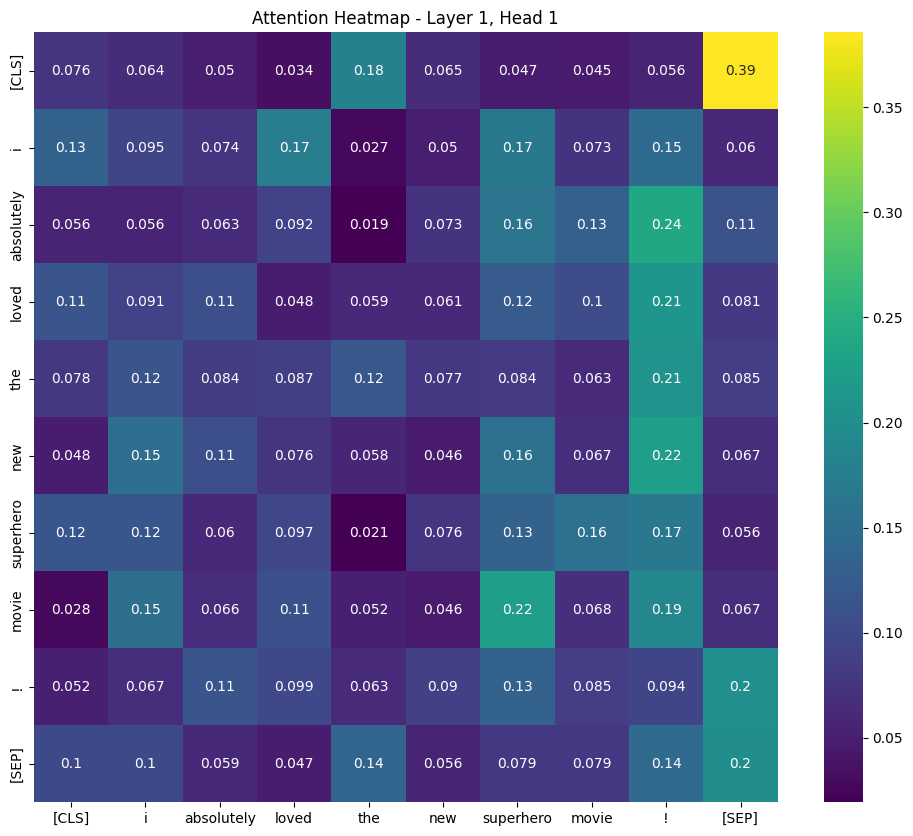

In [ ]:
# ----------------------------
# Attention Visualization for Transformer Models
# ----------------------------

# Step 0: Install Necessary Libraries
# -----------------------------------
# Uncomment and run the following line if 'bertviz' is not already installed.
!pip install transformers torch bertviz

# Step 1: Import Required Libraries
# ---------------------------------
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from bertviz import head_view
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Load Pre-trained BERT Model and Tokenizer
# --------------------------------------------------
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the pre-trained BERT model for sequence classification with attention outputs enabled
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', output_attentions=True)

# Set the model to evaluation mode
model.eval()

# Step 3: Define the Input Sentence
# ---------------------------------
# Example input sentence for classification
sentence = "I absolutely loved the new superhero movie!"

# Step 4: Tokenize the Input Sentence
# -----------------------------------
# Tokenize the input sentence and obtain input IDs and attention masks
inputs = tokenizer(sentence, return_tensors='pt')

# Step 5: Obtain Model Outputs Including Attention Weights
# ---------------------------------------------------------
# Pass the tokenized inputs through the model to get outputs
with torch.no_grad():
    outputs = model(**inputs)

# Extract attention weights from the outputs
# 'attentions' is a tuple with one element per layer, each of shape (batch_size, num_heads, seq_length, seq_length)
attentions = outputs.attentions

# Verify the shape of attentions to ensure correctness
print(f"Number of layers: {len(attentions)}")
print(f"Shape of attention in layer 1: {attentions[0].shape}")  # (1, num_heads, seq_length, seq_length)

# Step 6: Visualize Attention Weights
# -----------------------------------
# Convert input IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Use bertviz's head_view to visualize the attention
# bertviz expects attentions as a list of tensors (one per layer)
# Each tensor should have shape (num_heads, seq_length, seq_length)
head_view(attentions, tokens)

# Optional: Display the Attention Matrix as a Heatmap for a Specific Layer and Head
# -------------------------------------------------------------------------------
# Choose which layer and head to visualize
layer = 0    # Layer index (0-based)
head = 0     # Head index (0-based)

# Extract the specific attention weights for the chosen layer and head
# Shape: (seq_length, seq_length)
attention_weights = attentions[layer][0, head].cpu().numpy()

# Create a DataFrame for better visualization with seaborn
df_attention = pd.DataFrame(attention_weights, index=tokens, columns=tokens)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_attention, annot=True, cmap='viridis')
plt.title(f'Attention Heatmap - Layer {layer + 1}, Head {head + 1}')
plt.show()

# Step 7: Explanation of the Visualization
# ----------------------------------------
# The bertviz visualization shows interactive attention weights where:
# - Nodes represent tokens in the input sentence.
# - Colored lines between tokens indicate the strength of attention. Darker colors signify higher attention weights.
#
# In the heatmap:
# - Each cell [i, j] represents the attention weight from token i to token j.
# - Darker cells indicate stronger attention.
#
# **Interpretation Example:**
# For the sentence: "I absolutely loved the new superhero movie!"
# - The word "loved" may have strong attention to "absolutely" and "superhero movie", indicating these words are crucial for understanding the sentiment.
# - Adjectives like "absolutely" and "new" help the model gauge the intensity and novelty of the sentiment.
# - Function words like "the" may have weaker attention, as they carry less semantic weight.
#
# This suggests that the model effectively identifies and emphasizes sentiment-bearing words and phrases to make accurate classifications.


In [ ]:

import pandas as pd
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import os
import zipfile

# ----------------------------
# SINGLE-CELL TRAINING SCRIPT
# ----------------------------

# 1) Define Dataset Path
#    Make sure you've added the dataset via Kaggle's "Add Data" button:
#    For the "training.1600000.processed.noemoticon.csv" dataset,
#    the path often looks like:
DATA_PATH = "https://github.com/crwong/cs224u-project/blob/master/data/sentiment/training.1600000.processed.noemoticon.csv"

# 2) Define the CSV Columns
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# 3) Load the Dataset
df = pd.read_csv(
    DATA_PATH,
    names=columns,       # Provide column names
    header=None,         # There's no header in the original file
    encoding='latin-1',  # Common encoding for Sentiment140
    engine='python',
    on_bad_lines='skip'  # Skip any malformed lines
)

# Inspect top rows (optional print)
print("First 5 rows of the dataset:")
print(df.head())

# 4) Basic Preprocessing
# Map target values: 0 = negative, 4 = positive
df['target'] = df['target'].map({0: 0, 4: 1})

# Keep only relevant columns
df = df[['text', 'target']]

# Drop NaN
df.dropna(inplace=True)

# Check distribution
print("\nClass distribution:")
print(df['target'].value_counts())

# 5) Create Train/Validation Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(),
    df['target'].tolist(),
    test_size=0.1,
    random_state=42
)

# 6) Tokenize
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=128)

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# 7) Build PyTorch Datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)

# 8) Initialize Model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# 9) Metrics
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# 10) Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    run_name='sentiment_analysis_run',
    num_train_epochs=1,               # For demonstration, set 1 epoch. Increase as needed.
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    eval_strategy='epoch',
    save_strategy='epoch',
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# 11) Train
print("\nTraining the model...")
trainer.train()

# 12) Save Model and Tokenizer
print("\nSaving the model and tokenizer...")
trainer.save_model('./trained_model')
tokenizer.save_pretrained('./trained_model')

# 13) Zip Trained Model for Download
print("\nCompressing the trained_model folder...")
zipf = zipfile.ZipFile('trained_model.zip', 'w', zipfile.ZIP_DEFLATED)
for root, dirs, files in os.walk('./trained_model'):
    for file in files:
        file_path = os.path.join(root, file)
        archive_path = os.path.join('trained_model', os.path.relpath(file_path, './trained_model'))
        zipf.write(file_path, arcname=archive_path)
zipf.close()
print("Compression completed. You can download 'trained_model.zip' from Output.")
